# Table of contents
1. [Data Loading and Inspection](#Task1)
2. [Data Visualization](#Task2)
3. [Data Analysis](#Task3)
4. [Predictive Analysis](#Task4)
5. [Data Interpretation](#Task5)

## Task 1: Data Loading and Inspection  <a name="Task1"></a>

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv("insurance.csv")

In [3]:
# Display the first 5 rows of the dataset.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# display numbers of rows and columns
df.shape

(1338, 7)

In [5]:
# Display the summary statisticcs of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Check for missing values in the dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check for duplicate
df.duplicated().sum()

1

In [8]:
# Display the row with duplicate value in the dataset
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# Drop the duplicate
df.drop_duplicates(keep = "first", inplace = True)

In [10]:
# Check once again for duplicate to see if it's been droped
df.duplicated().sum()

0

## Task 2: Data Visualization  <a name="Task2"></a>

In [11]:
# Creating a bar chart to visualize the distribution of individuals based on their smoker status
def count_plot(x_axis):
    '''Plotting two categorical variables against eachother'''
    plt.figure(figsize = (15,10))
    plt.title(f"Bar Chart Distribution of {x_axis} based on smoker status.".title())
    ax = sns.countplot(x = x_axis,hue = 'smoker', data = df, color = sns.color_palette()[0]);
    plt.ylabel("Frequecy".title())
    plt.xlabel(x_axis.title())
    for label in ax.containers:
        ax.bar_label(label)

In [12]:
# Creating a bar chart to visualize the distribution of individuals based on their smoker status
def bar_plot(y_axis):
    '''Plotting a numerical variable against a categorical variable'''
    plt.figure(figsize = (15, 10))
    plt.title(f"Bar Chart Distribution of {y_axis} based on smoker status.".title())
    ax = sns.barplot(data = df, x = "smoker", y = y_axis, errorbar = None, color = sns.color_palette()[0] )
    plt.ylabel(y_axis.title())
    plt.xlabel("smoker".title())

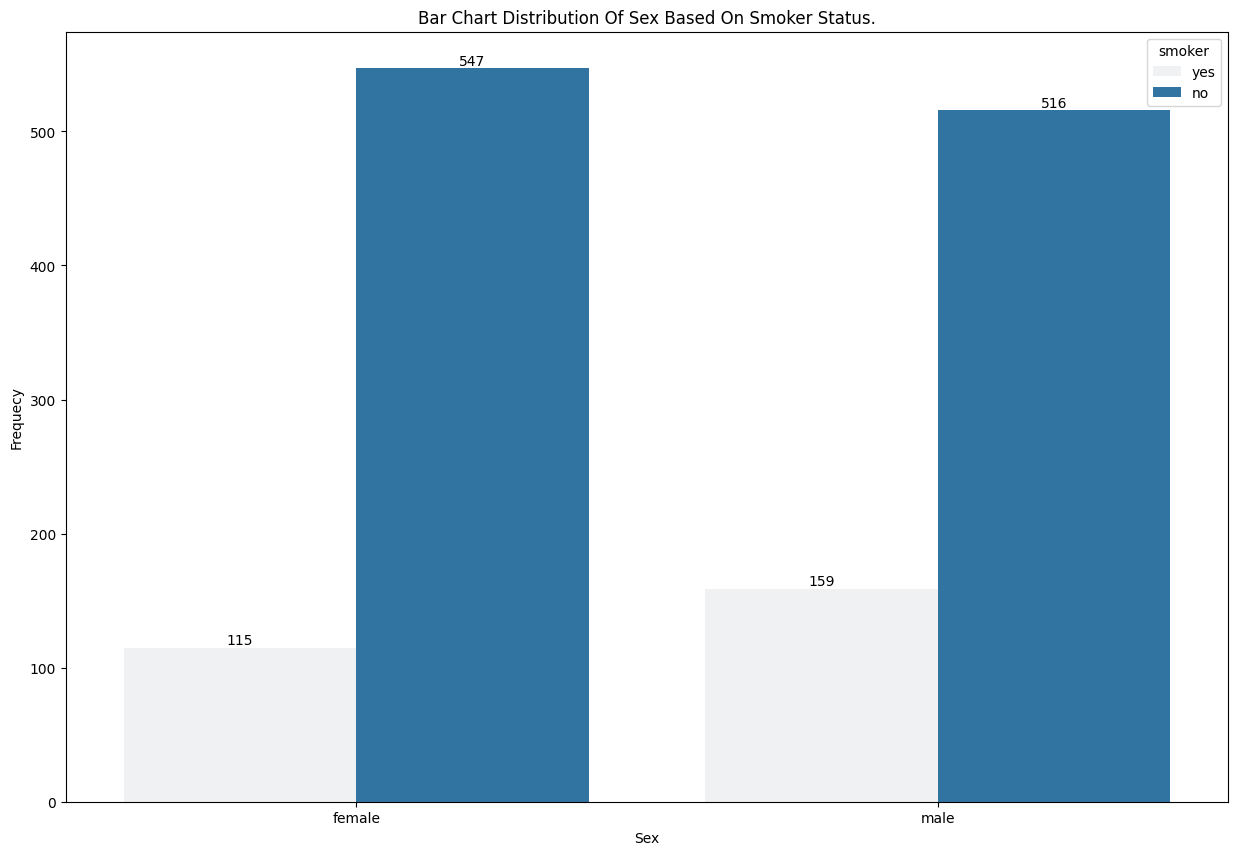

In [13]:
# calling the function on the sex column
count_plot("sex")

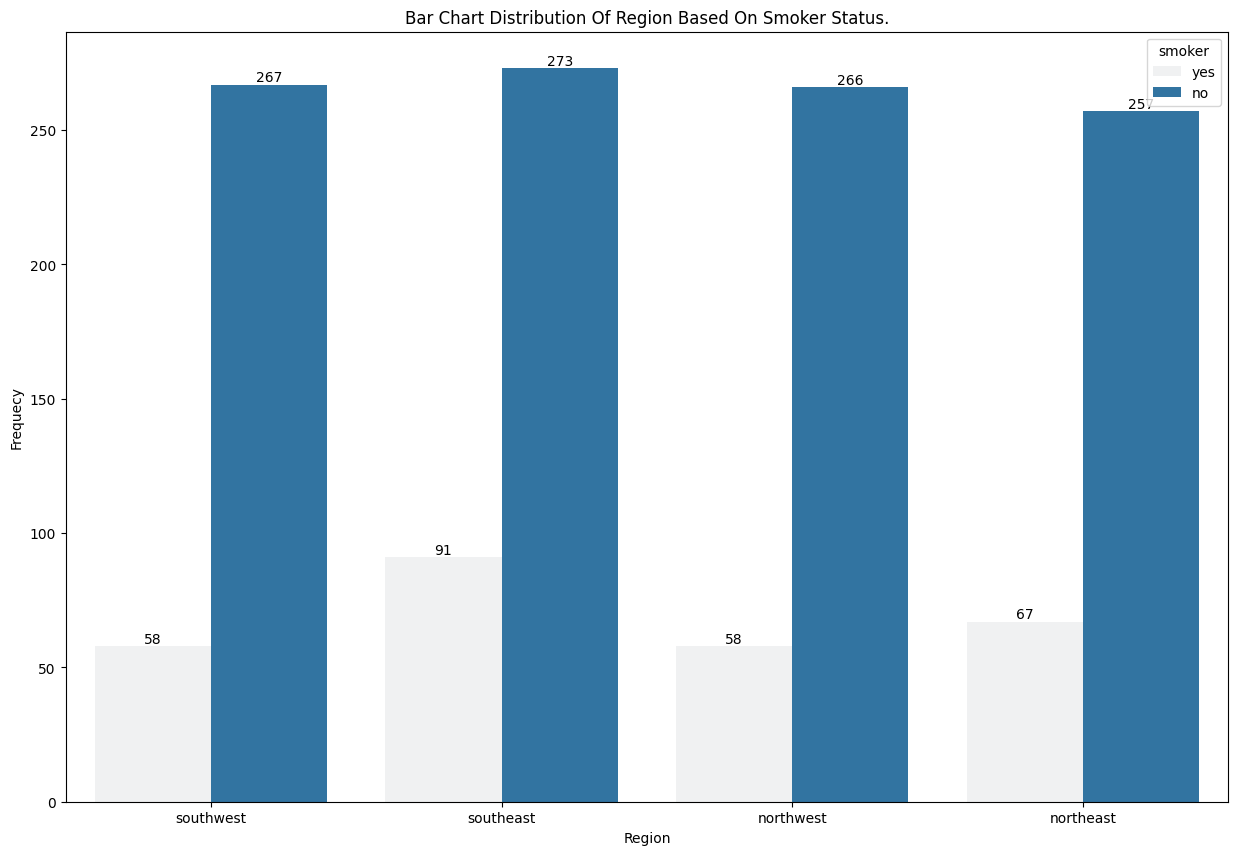

In [14]:
# calling the function on the region column
count_plot('region')

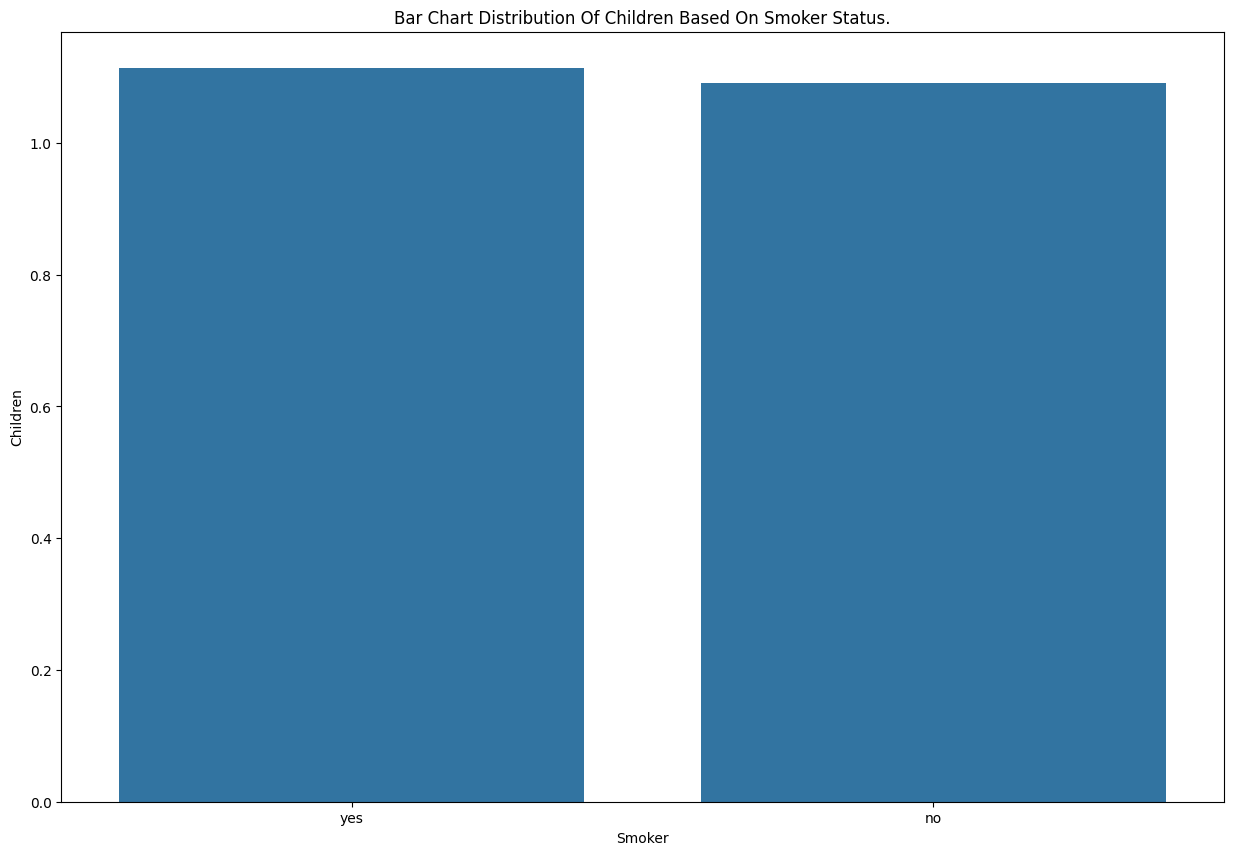

In [15]:
# calling the function on the children column
bar_plot("children")

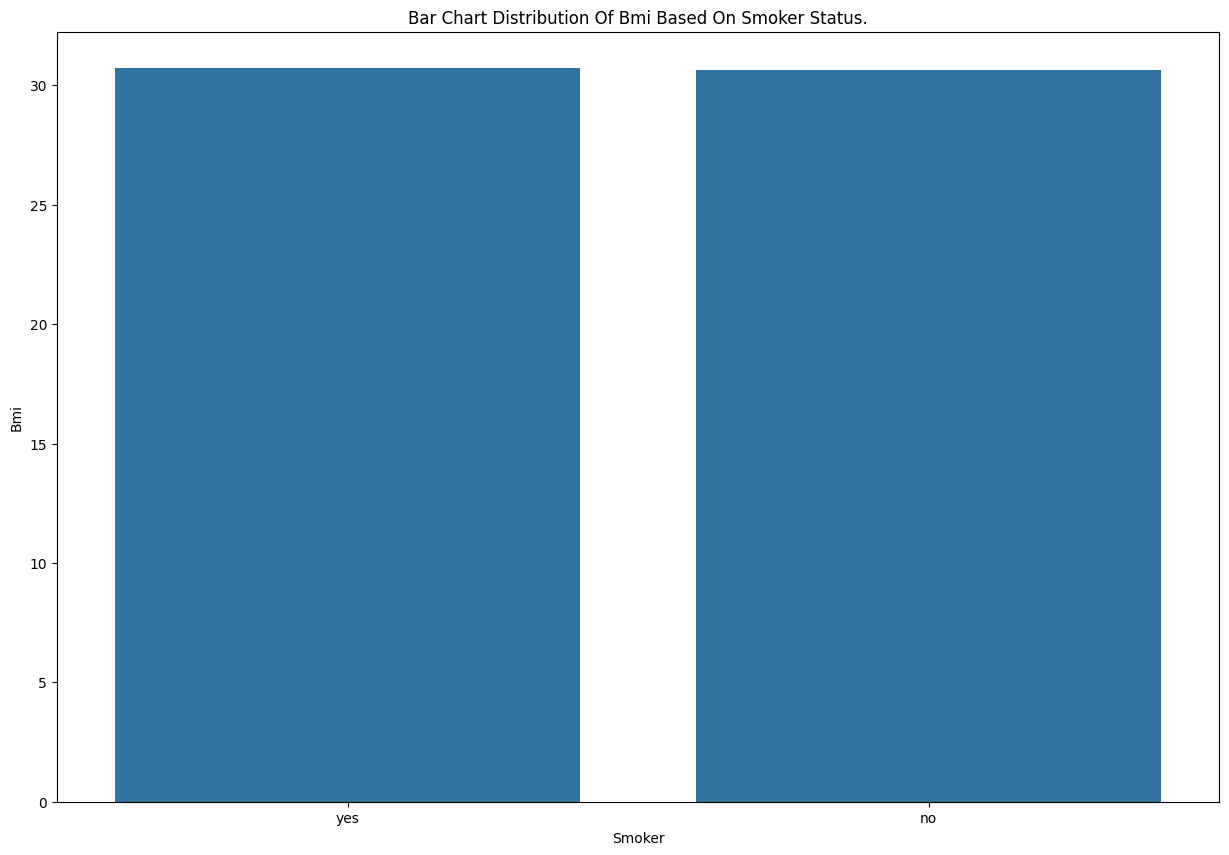

In [16]:
bar_plot("bmi")

In [17]:
# creating another column called bmi_level that categorize bmi on their appropriate levels
df["bmi_level"] = pd.cut(df['bmi'].values, bins= [0, 18.5,24.9,29.9, 39.9, 40], labels = ["underweight", "healthy", "overweight", "obesity", "severe obesity"])

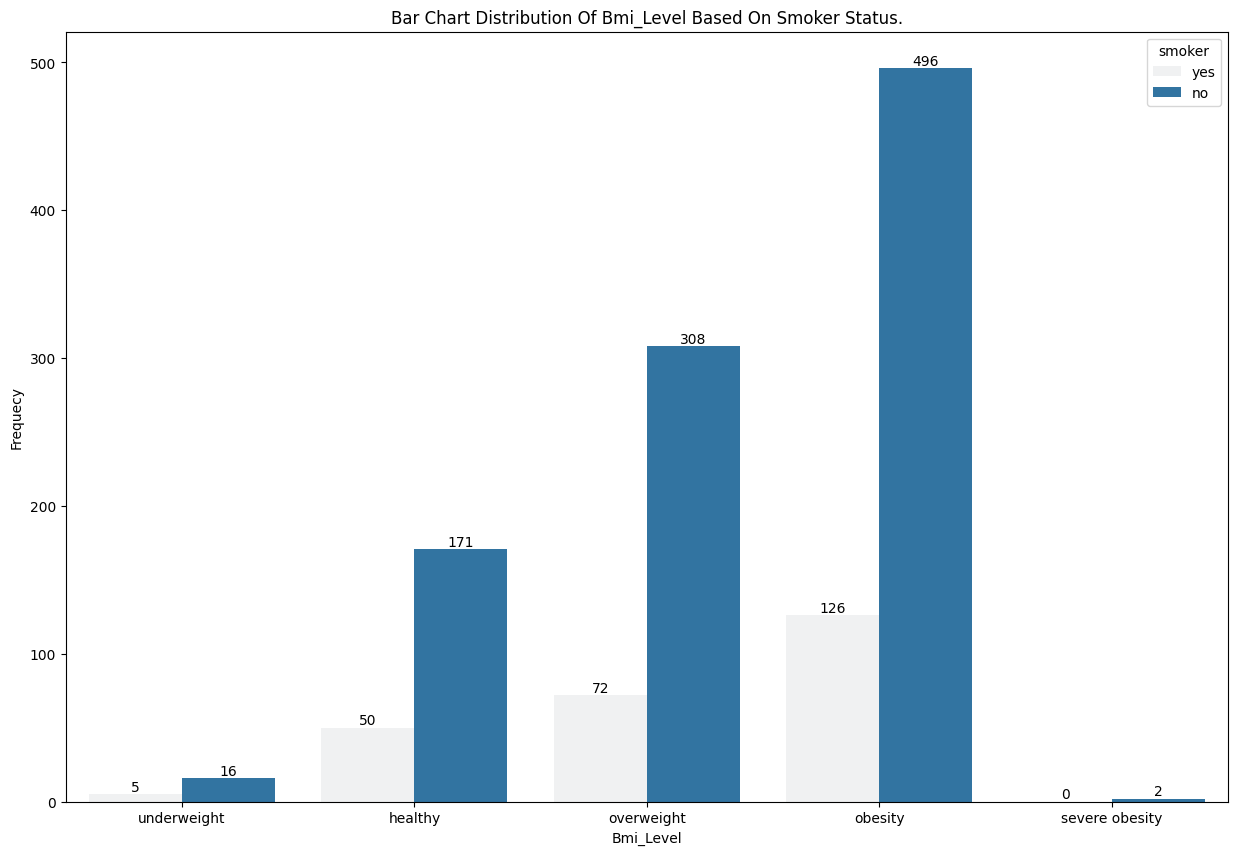

In [18]:
# calling the function on the bmi_level column
count_plot("bmi_level")

In [19]:
df.bmi_level.unique()

['overweight', 'obesity', 'healthy', NaN, 'underweight', 'severe obesity']
Categories (5, object): ['underweight' < 'healthy' < 'overweight' < 'obesity' < 'severe obesity']

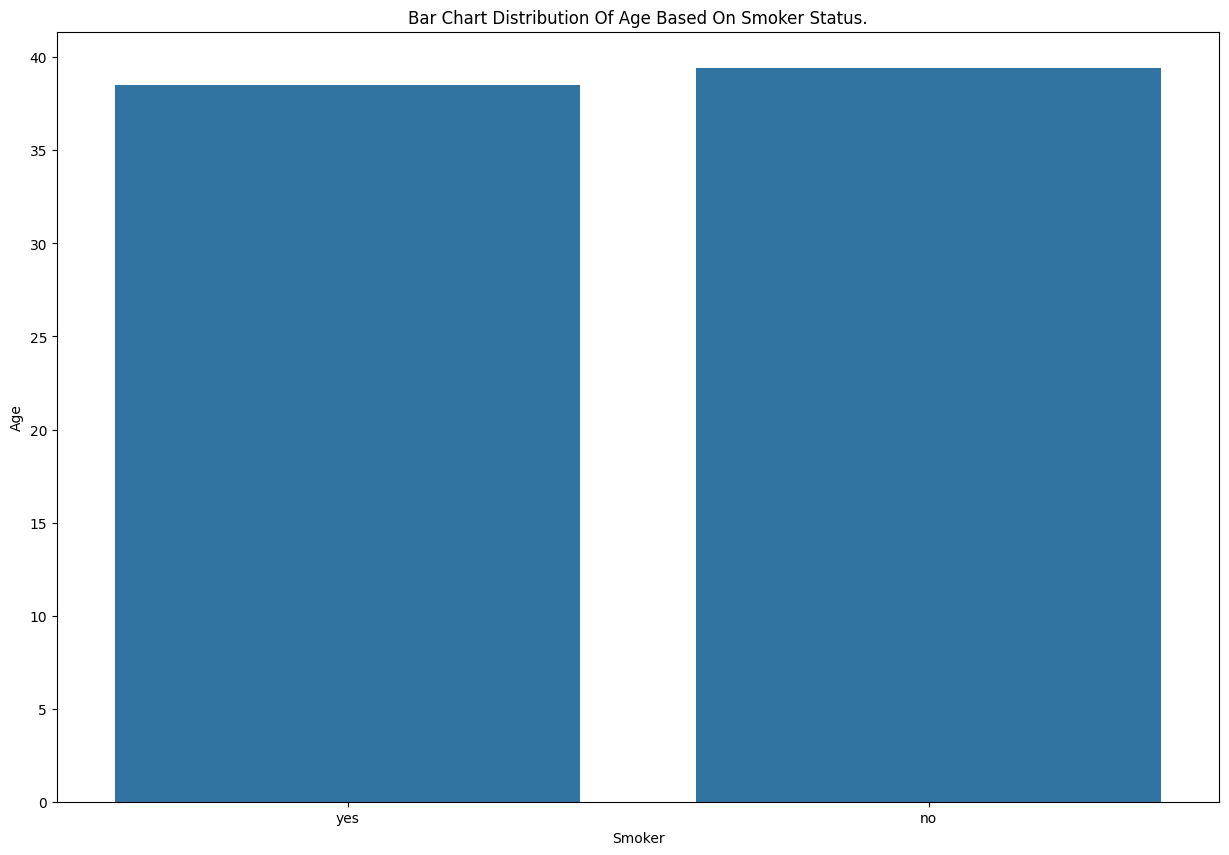

In [20]:
# calling the function on the age column
bar_plot("age")

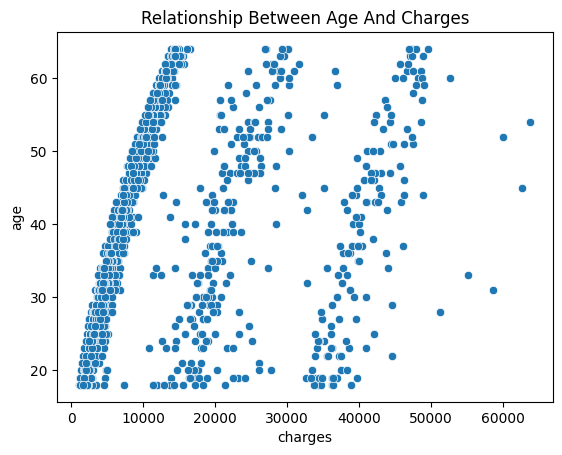

In [21]:
# creating a scatter plot to visualize the relationship between age and charges
sns.scatterplot(data = df, x = "charges", y = "age");
plt.title("Relationship between age and charges".title());

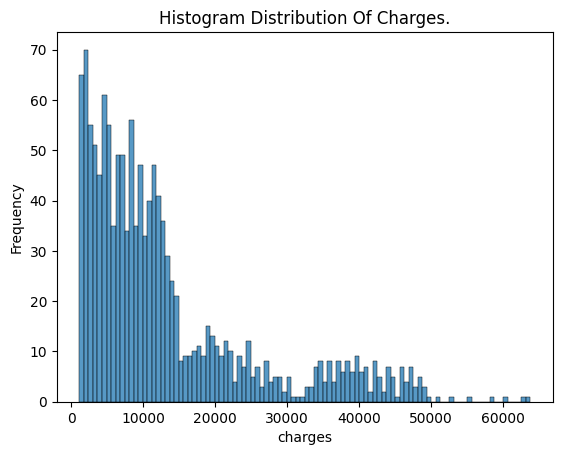

In [22]:
# creating a histogram to visualize the distribution charges
sns.histplot(df, x = df.charges, bins = 100);
plt.title("Histogram Distribution of Charges.".title());
plt.ylabel("Frequency");

## Task 3: Data Analysis  <a name="Task3"></a>

In [23]:
# calculate and print out the average BMI based on individual ages in the dataset
df.groupby('age').aggregate("mean")['bmi'].sort_values(ascending= False)

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_3360\1716200250.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age').aggregate("mean")['bmi'].sort_values(ascending= False)


age
64    32.976136
52    32.936034
58    32.718200
61    32.548261
62    32.342609
55    31.950000
48    31.925690
63    31.923478
51    31.727069
56    31.600962
32    31.597692
41    31.506852
23    31.454464
35    31.394800
46    31.340862
18    31.326159
54    31.234286
37    31.216600
33    31.163077
50    31.132241
22    31.087679
57    30.844423
44    30.844259
47    30.664310
20    30.632759
59    30.572000
30    30.557593
53    30.360893
60    30.332826
42    30.328148
49    30.313929
34    30.274038
43    30.204444
40    30.139074
31    29.918333
39    29.910200
45    29.778966
25    29.693929
28    29.482143
26    29.428929
29    29.383148
36    29.374200
27    29.333571
24    29.142679
38    28.996600
19    28.567164
21    28.185714
Name: bmi, dtype: float64

In [24]:
# calculate and print out the average BMI based on individual sex in the dataset
df.groupby('sex').aggregate("mean")['bmi']

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_3360\443273940.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').aggregate("mean")['bmi']


sex
female    30.377749
male      30.943652
Name: bmi, dtype: float64

In [25]:
# calculate and print out the average BMI based on individual number of children in the dataset
df.groupby('children').aggregate("mean")['bmi']

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_3360\301709762.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('children').aggregate("mean")['bmi']


children
0    30.550227
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

In [26]:
# calculate and print out the average BMI based on individual smoker status in the dataset
df.groupby('smoker').aggregate("mean")['bmi']

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_3360\2799048993.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoker').aggregate("mean")['bmi']


smoker
no     30.651853
yes    30.708449
Name: bmi, dtype: float64

In [27]:
# calculate and print out the average BMI based on individual region in the dataset
df.groupby('region').aggregate("mean")['bmi']

C:\Users\EMINENT_THINKER\AppData\Local\Temp\ipykernel_3360\805108779.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').aggregate("mean")['bmi']


region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [28]:
# df.groupby('charges').aggregate("mean")['bmi']

In [29]:
# calculate and print the percentage of individuals who have children
has_child = sum(df['children'] > 0)
total = sum(df["children"])
percentage = (has_child/total) * 100
f"The percentage of the individual that has children is: {percentage: .2f}%" 

'The percentage of the individual that has children is:  52.15%'

In [30]:
# calculate and print the average insurance charges for individuals who smoke and those who do not smoke
print(f"The average insurance charges for individuals who smoke is: {np.mean(df[df['smoker'] == 'yes'].charges)}")
print(f"The average insurance charges for individuals who do not smoke is: {np.mean(df[df['smoker'] == 'no'].charges)}")

The average insurance charges for individuals who smoke is: 32050.23183153284
The average insurance charges for individuals who do not smoke is: 8440.660306508937


## Task 4: Predictive Analysis  <a name="Task4"></a>

In [31]:
# importing all necessary methods from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# create both input variables and target variable
X = df.drop(['bmi_level', 'charges'], axis = 1)
y = df.charges

In [33]:
# Encoding the categorical variables
# cat_df = df.select_dtypes(include=['category', 'object'])
# num_df = df.select_dtypes(exclude= ["category", "object"])
X = pd.get_dummies(X)

In [34]:
# splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 11), (268, 11), (1069,), (268,))

In [35]:
# calling LineraRegression() method and fit it on the training sets
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
# checking the regression default score
lin_reg.score(X_train, y_train)

0.7299057809339075

In [37]:
# Evaluating the model performance by the coefficient of detrmination (R-squared) on the testing sets
y_preds = lin_reg.predict(X_test)
lin_score = r2_score(y_test, y_preds)
lin_score

0.8069287081198013

In [38]:
# y_preds = lin_reg.predict(X_test)
# lin_mse = mean_squared_error(y_test, y_preds)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [39]:
# Evaluating the model performance by the mean absolute error (MAE) on the testing sets
y_preds = lin_reg.predict(X_test)
lin_mae = mean_absolute_error(y_test, y_preds)
lin_mae

4177.045561036321

In [40]:
# printing out the predictions and actual charges
print("Predictions:", lin_reg.predict(X_test)[:5])
print("Labels:", list(y_test)[:5])

Predictions: [ 8143.69388412  5737.11568259 14369.31487618 31745.51363586
  8962.38665706]
Labels: [8688.85885, 5708.867, 11436.73815, 38746.3551, 4463.2051]


In [41]:
# calling DecisionTreeRegressor() method and fit it on the training sets
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
# checking regression default score
tree_reg.score(X_train, y_train)

1.0

In [43]:
# Evaluating the model performance by the coefficient of detrmination (R-squared) on the testing sets
y_preds = tree_reg.predict(X_test)
tree_score = r2_score(y_test, y_preds)
tree_score

0.784590484493854

In [44]:
# y_preds = tree_reg.predict(X_test)
# tree_mse = mean_squared_error(y_test, y_preds)
# tree_rmse = np.sqrt(tree_mse)
# tree_rmse

In [45]:
# Evaluating the model performance by the mean absolute error (MAE) on the testing sets
y_preds = tree_reg.predict(X_test)
tree_mae = mean_absolute_error(y_test, y_preds)
tree_mae

2938.1714448843286

In [46]:
# printing out the predictions and actual charges
print("Predictions:", tree_reg.predict(X_test)[:5])
print("Labels:", list(y_test)[:5])

Predictions: [ 9361.3268   5325.651   11015.1747  44585.45587  4949.7587 ]
Labels: [8688.85885, 5708.867, 11436.73815, 38746.3551, 4463.2051]


In [47]:
# calling RandomForestRegressor() method and fit it on the training sets
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
# checking the regression default score
forest_reg.score(X_train, y_train)

0.9756835954785242

In [49]:
# Evaluating the model performance by the coefficient of detrmination (R-squared) on the testing sets
y_preds = forest_reg.predict(X_test)
forest_score = r2_score(y_test, y_preds)
forest_score

0.8847966053384912

In [50]:
# y_preds = forest_reg.predict(X_test)
# forest_mse = mean_squared_error(y_test, y_preds)
# forest_rmse = np.sqrt(forest_mse)
# forest_rmse

In [51]:
# Evaluating the model performance by the mean absolute error (MAE) on the testing sets
y_preds = forest_reg.predict(X_test)
forest_mae = mean_absolute_error(y_test, y_preds)
forest_mae

2531.7605690869404

In [52]:
# printing out the predictions and actual charges
print("Predictions:", forest_reg.predict(X_test)[:5])
print("Labels:", list(y_test)[:5])

Predictions: [10304.744968   7054.0762064 11650.8980292 43451.5095265  6153.3769067]
Labels: [8688.85885, 5708.867, 11436.73815, 38746.3551, 4463.2051]


## Task 5: Data Interpretation  <a name="Task5"></a>

- **Observations:** 
  - The result shows that 52% of the individual in the dataset has at least one child while 48% of them has no child.
  - It was noted that the average insurance charges for individuals who do smoke is less than the ones for those who do not smoke.
  - It was discovered that the Southern regions have higher average BMI (Body Mass Index) as compared to the Northern regions.
  - It was seen that the average BMI of the individuals who do smoke is higher than the average BMI of those who do not smoke though by insignificant number.
  - The average BMI for individuals who have 4 children was highest, followed by those with <= 3 children while those with 5 children recorded having lowest average BMI.
  - It was observed that the male has the highest average BMI.
  - Lastly, 64-year-old individuals have the highest average BMI.

- **Conclusions:**
   - It was concluded that the individuals who do not smoke is much higher than the ones who do smoke.
   - Around 54-year-old individual has the highest insurance charges.
   - 18-year-old individuals have the highest record for who do not smoke.
   - 497 individuals that was in obesity BMI level did not smoke.
   - The higher the number of child the lesser the number of individuals who do not smoke.
   - SouthEast has the highest record for individuals who do not smoke as well as who do smoke.
   - Both SouthWest and NorthWest has equal number of individuals who smoke as well as who do not smoke.
   - Male individuals was recorded highest for smokers.

- **Results Interpretation of the predictive model and brief discussion on its accuracy and usefulness:**

  - The predictive model `RandomForestRegressor()`  is chosen based on its R-squared value that indicates how well the model's predictions match the actual data, with a value closer to 1 indicating a better fit.
  - An R-squared value of 0.8847966053384912 indicates that approximately 88.48% of the variability in the target variable (charges) can be explained by the model. A higher R-squared value suggests a relatively strong fit to the data.
  - The mean absolute value (MAE) of 2531.7605690869404 represents the average absolute difference between the predicted charges and the actual charges. It gives an idea of how much the model's predictions deviate from the true values on average. Lower MAE values indicate better predictive accuracy.
  - In summary, the model has a relatively high R-squared value and a moderate MAE, which suggests that it provides a reasonably good fit to the data and can make fairly accurate predictions of charges.